In [1]:
'''

@Author: Vighnesh Harish Bilgi
@Date: 2022-11-02
@Last Modified by: Vighnesh Harish Bilgi
@Last Modified time: 2022-11-02
@Title : AWS BOTO3 programs

'''

'\n\n@Author: Vighnesh Harish Bilgi\n@Date: 2022-11-02\n@Last Modified by: Vighnesh Harish Bilgi\n@Last Modified time: 2022-11-02\n@Title : Transfer files to CSV \n\n'

In [20]:
import pandas as pd
import boto3
from io import StringIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import os
os.environ['AWS_DEFAULT_REGION'] = 'ap-south-1'
os.environ['AWS_ACCESS_KEY_ID'] = os.environ.get('test1_access_key')
os.environ['AWS_SECRET_ACCESS_KEY'] = os.environ.get('test1_secret_access_key')

### 1.Uploading different file formats to S3 Bucket.

#### 1.1. Upload CSV File to AWS S3

In [4]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    df = pd.read_csv('sampleFiles/iris-dataset.csv')

    client.upload_file(Filename = 'sampleFiles/iris-dataset.csv',Bucket = 'transfer-to-s3', Key = 'iris-dataset.csv')

if __name__ == "__main__":
    main()

#### 1.2. Upload TXT File to AWS S3

In [3]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    s3 =  boto3.resource('s3')
    # client = boto3.client("s3")
    return s3

def main():

    s3 = connect_to_s3()

    # client.upload_file(Filename = 'sampleFiles/sampleText.txt',Bucket = 'transfer-to-s3', Key = 'sampleText.txt')
    s3.Bucket('transfer-to-s3').upload_file(Filename = 'sampleFiles/sampleText.txt', Key = 'sampleText.txt')

if __name__ == "__main__":
    main()

#### 1.3. Upload JSON File to AWS S3

In [5]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    df = pd.read_json('sampleFiles/sampleJSON.json')

    client.upload_file(Filename = 'sampleFiles/sampleJSON.json',Bucket = 'transfer-to-s3', Key = 'sampleJSON.json')

if __name__ == "__main__":
    main()

#### 1.4. Upload PNG File to AWS S3

In [6]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    client.upload_file(Filename = 'sampleFiles/aws.png',Bucket = 'transfer-to-s3', Key = 'aws.png')

if __name__ == "__main__":
    main()

### 2. Load and Download Files from AWS S3 Bucket

#### 2.1. Load and Download CSV file from AWS S3 bucket

In [5]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    # obj = s3.Bucket('transfer-to-s3').Object('sampleCSV2.csv').get()
    obj = client.get_object(Bucket='transfer-to-s3', Key='sampleCSV2.csv')

    df = pd.read_csv(obj['Body'], index_col=0)
    print(df.head(5))

    # s3.Bucket('transfer-to-s3').download_file(Key = 'sampleCSV2.csv', Filename = 'sampleFiles/sampleCSV2.csv')
    client.download_file('transfer-to-s3', 'sampleCSV2.csv', 'sampleFiles/sampleCSV2.csv')

if __name__ == "__main__":
    main()

     Industry_aggregation_NZSIOC Industry_code_NZSIOC Industry_name_NZSIOC  \
Year                                                                         
2021                     Level 1                99999       All industries   
2021                     Level 1                99999       All industries   
2021                     Level 1                99999       All industries   
2021                     Level 1                99999       All industries   
2021                     Level 1                99999       All industries   

                   Units Variable_code  \
Year                                     
2021  Dollars (millions)           H01   
2021  Dollars (millions)           H04   
2021  Dollars (millions)           H05   
2021  Dollars (millions)           H07   
2021  Dollars (millions)           H08   

                                        Variable_name      Variable_category  \
Year                                                                          

#### 2.2. Load and Download TXT file from AWS S3 bucket

In [17]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    obj = client.get_object(Bucket='transfer-to-s3', Key='sampleText2.txt')

    text_file = obj['Body'].read().decode(encoding="utf-8",errors="ignore")
    print(text_file)

    client.download_file('transfer-to-s3', 'sampleText2.txt', 'sampleFiles/sampleText2.txt')

if __name__ == "__main__":
    main()

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3,1.4,0.1,Iris-setosa
4.3,3,1.1,0.1,Iris-setosa
5.8,4,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5,3,1.6,0.2,Iris-setosa
5,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.

#### 2.3. Load and Download JSON file from AWS S3 bucket

In [13]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    obj = client.get_object(Bucket='transfer-to-s3', Key='sampleJSON2.json')

    df = pd.read_json(obj['Body'])
    print(df.head(5))

    client.download_file('transfer-to-s3', 'sampleJSON2.json', 'sampleFiles/sampleJSON2.json')

if __name__ == "__main__":
    main()

                             name    type  \
0  com.miguno.avro.twitter_schema  record   
1  com.miguno.avro.twitter_schema  record   
2  com.miguno.avro.twitter_schema  record   

                                              fields  
0  {'name': 'username', 'type': 'string', 'doc': ...  
1  {'name': 'tweet', 'type': 'string', 'doc': 'Th...  
2  {'name': 'timestamp', 'type': 'long', 'doc': '...  


#### 2.4. Load and Download PNG file from AWS S3 bucket

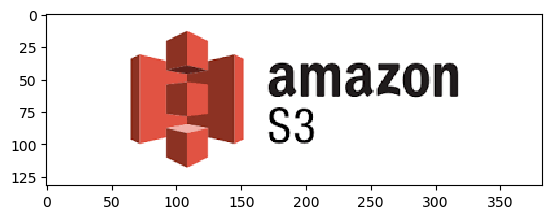

In [22]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    obj = client.get_object(Bucket='transfer-to-s3', Key='s3.png')

    # img_file = obj['Body'].read()
    # print(img_file)

    client.download_file('transfer-to-s3', 's3.png', 'sampleFiles/s3.png')

    img=mpimg.imread('sampleFiles/s3.png')
    imgplot = plt.imshow(img)
    plt.show(imgplot)


if __name__ == "__main__":
    main()

### 3. Upload large file to AWS S3 Bucket

In [6]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    # s3 =  boto3.resource('s3')
    client = boto3.client("s3")
    return client

def main():

    client = connect_to_s3()

    df = pd.read_csv('sampleFiles/iris-dataset.csv')

    #s3.Bucket('transfer-to-s3').upload_file(Filename = 'sampleFiles/ubuntu-20.04.iso', Key = 'ubuntu-20.04.iso')
    client.upload_file(Filename = 'sampleFiles/ubuntu-20.04.iso',Bucket = 'transfer-to-s3', Key = 'ubuntu-20.04.iso')

if __name__ == "__main__":
    main()

### 4. CRUD operation

In [7]:
def connect_to_s3():
    """

    Description:
        To connect to AWS S3 service through an IAM user.
    Parameter:
        No parameters
    Return:
        ServiceResource s3
    """
    s3 =  boto3.resource(service_name = 's3')
    return s3

def upload_to_bucket(path,s3):
    """

    Description:
        Create a csv out of a dataframe by taking file path of csv file (i.e. string 'path') and uploading it to AWS S3 bucket.
    Parameter:
        string path,
        ServiceResource s3
    Return:
        No values returned.
    """

    df = pd.read_csv(path)
    file_key = path.split('/')[1]
    s3.Bucket('crud-bucket-demo').upload_file(Filename = path, Key = file_key)

def create_bucket(s3):
    """

    Description:
       
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """

    s3.create_bucket(Bucket = 'crud-bucket-demo',  CreateBucketConfiguration={'LocationConstraint': 'ap-south-1'})
    print("Printing all bucket names to verify if - crud-bucket-demo is created:")
    for bucket in s3.buckets.all():
        print(bucket.name)

def read_bucket(s3):
    """

    Description:
       
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """

    for obj in s3.Bucket('crud-bucket-demo').objects.all():

        print(obj.key)
        csv_obj = s3.Bucket('crud-bucket-demo').Object(obj.key).get()
        read_df = pd.read_csv(csv_obj['Body'], index_col=0)
        print(read_df,"\n")

def add_column(obj,new_col,s3):
    """

    Description:
       
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """
    csv_buffer = StringIO()
    address_book_df = pd.read_csv(obj['Body'], index_col=0)
    address_book_df['MobileNumber'] =  new_col
    address_book_df.to_csv(csv_buffer, index= False)
    s3.Object('crud-bucket-demo', 'address_book_csv.csv').put(Body=csv_buffer.getvalue())

    return address_book_df

def add_row(obj,new_row,s3):
    """

    Description:
       
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """
    csv_buffer = StringIO()
    shop_df = pd.read_csv(obj['Body'], index_col=0)
    shop_df = shop_df.append(new_row, ignore_index = True)
    shop_df['ItemID'] = ['ITM001','ITM002','ITM003','ITM004']
    shop_df.to_csv(csv_buffer, index= False)
    s3.Object('crud-bucket-demo', 'shop_csv.csv').put(Body=csv_buffer.getvalue())

    return shop_df

def change_value(obj,new_value,s3):
    """

    Description:
       
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """
    csv_buffer = StringIO()
    employee_df = pd.read_csv(obj['Body'], index_col=0)
    employee_df['EmpID'] = new_value
    employee_df.to_csv(csv_buffer, index= False)
    s3.Object('crud-bucket-demo', 'employee_csv.csv').put(Body=csv_buffer.getvalue())

    return employee_df

def delete_bucket(s3):
    """

    Description:
       
    Parameter:
        ServiceResource s3
    Return:
        No values returned.
    """
    s3.Bucket('crud-bucket-demo').objects.all().delete()
    print('Reading each file from bucket : crud-bucket-demo')

    for obj in s3.Bucket('crud-bucket-demo').objects.all():

        print(obj.key)
        csv_obj = s3.Bucket('crud-bucket-demo').Object(obj.key).get()
        read_df = pd.read_csv(csv_obj['Body'], index_col=0)
        print(read_df,"\n")

    # Delete bucket
    s3.Bucket('crud-bucket-demo').delete()
    print("Printing all bucket names to verify if - crud-bucket-demo is deleted:")
    for bucket in s3.buckets.all():
        print(bucket.name)


def main():

    s3 = connect_to_s3()

    # CRUD operations

    # 1. C : CREATE
    # 1a. Create Bucket
    create_bucket(s3)

    # 1b. Reading 3 csv files and loading them to the bucket

    path = 'sampleFiles/address_book_csv.csv'
    upload_to_bucket(path,s3)

    path = 'sampleFiles/employee_csv.csv'
    upload_to_bucket(path,s3)

    path = 'sampleFiles/shop_csv.csv'
    upload_to_bucket(path,s3)

    # 2. R : READ
    print('\nReading each file from bucket : crud-bucket-demo')
    read_bucket(s3)

    # 3. U : UPDATE
    # Updating csv files and loading them to bucket

    print("Adding MobileNumber column to address_book_df")
    obj = s3.Bucket('crud-bucket-demo').Object('address_book_csv.csv').get()
    mobNo = [9012783465,9763214580,8192037465]
    new_df = add_column(obj,mobNo,s3)
    print(new_df)

    #Changing 'EMP003' to 'EMP004' in employee_df
    print("Changing 'EMP003' to 'EMP004' in employee_df")
    obj = s3.Bucket('crud-bucket-demo').Object('employee_csv.csv').get()
    new_value = ['EMP001','EMP002','EMP004']
    new_df = change_value(obj,new_value,s3)
    print(new_df)

    # Adding new item to shop_df
    print("Adding new item to shop_df")
    obj = s3.Bucket('crud-bucket-demo').Object('shop_csv.csv').get()
    new_item_dict = {'ItemID':'ITM004', 'ProductName':'Sharpner', 'Price': 10}
    new_df = add_row(obj,new_item_dict,s3)
    print(new_df)

    # 4. D : DELETE
    # DELETE Bucket
    # Remove all files/objects under bucket and deleting bucket

    delete_bucket(s3)


if __name__ == "__main__":
    main()

Printing all bucket names to verify if - crud-bucket-demo is created:
crud-bucket-demo
mumbai-bucket-demo
transfer-to-s3

Reading each file from bucket : crud-bucket-demo
address_book_csv.csv
           Lastname       City        State     Zip      Address  \
Firstname                                                          
Vighnesh      Bilgi       Pune  Maharashtra  411019  HDFC Colony   
Anoop      Aparajit     Nagpur  Maharashtra  440036      Jaitala   
Carl           Pais  Bengaluru    Bengaluru  671326   Whitefield   

                       Email  
Firstname                     
Vighnesh   vhbilgi@gmail.com  
Anoop           aa@yahoo.com  
Carl             cvp@aol.com   

employee_csv.csv
       Firstname Lastname       Role       Dept       MobNo
EmpID                                                      
EMP001    George    Smith   DataEngg         IT  9049480396
EMP002     Rahul    Kumar     SWEngg         IT  8220858443
EMP003    Priyal    Nayak  SalesEngg  Marketing  9876

/tmp/ipykernel_41174/1123282469.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shop_df = shop_df.append(new_row, ignore_index = True)


  ProductName  Price  ItemID
0       Pepsi     25  ITM001
1        Acer  70000  ITM002
2       Chair    500  ITM003
3    Sharpner     10  ITM004
Reading each file from bucket : crud-bucket-demo
Printing all bucket names to verify if - crud-bucket-demo is deleted:
mumbai-bucket-demo
transfer-to-s3
